In [1]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [3]:
og = pd.read_csv("Aug11TweetsReferenceInfo.csv")

In [19]:
df = pd.DataFrame()

In [20]:
finaldates = []
for time in og["time"]:
    m = time[4:7]
    n = "n"
    if m == "Jan":
        n = "01"
    elif m == "Feb":
        n = "02"
    elif m == "Mar":
        n = "03"
    elif m == "Apr":
        n = "04"
    elif m == "May":
        n = "05"
    elif m == "Jun":
        n = "06"
    elif m == "Jul":
        n = "07"
    elif m == "Aug":
        n = "08"
    elif m == "Sep":
        n = "09"
    elif m == "Oct":
        n = "10"
    elif m == "Nov":
        n = "11"
    elif m == "Dec":
        n = "12"
    y = time[-4:]
    d = time[8:10]
    date = y + "-" + n + "-" + d
    finaldates.append(date)
df["date"] = finaldates

In [13]:
dectreedf = pd.read_csv("DecisionTreeTweets.csv")
lgbmdf = pd.read_csv('LGBMPredictedTweets.csv')
ranfordf = pd.read_csv('RandomForestTweets.csv')
sgddf = pd.read_csv('SGDPredictedTweets.csv')
cnndf = pd.read_csv("CNNTweets.csv")

In [23]:
df["decision_tree_score"] = dectreedf.scores
df["cnn_score"] = cnndf.score
df["lgbm_score"] = lgbmdf.scores
df["sgd_score"] = sgddf.scores
df["random_forest_score"] = ranfordf.scores

In [24]:
df.head()

,date,decision_tree_score,cnn_score,lgbm_score,sgd_score,random_forest_score
0,2020-08-24,0.0,0.025332,0.001948,0.063412,0.0
1,2020-08-24,0.0,0.011674,0.001293,0.033553,0.0
2,2020-08-24,0.0,0.025332,0.001948,0.063412,0.0
3,2020-08-24,0.0,0.025332,0.001948,0.063412,0.0
4,2020-08-24,0.0,0.025332,0.001948,0.063412,0.0


In [28]:
df.to_csv('AllModelsTweetsTogether.csv')

In [2]:
dfdate = pd.read_csv('AllModelsTweetsTogether.csv',
                                parse_dates=['date'],
                                index_col=['date'])

dfdate.head()

,Unnamed: 0,decision_tree_score,cnn_score,lgbm_score,sgd_score,random_forest_score
date,,,,,,
2020-08-24,0,0.0,0.025332,0.001948,0.063412,0.0
2020-08-24,1,0.0,0.011674,0.001293,0.033553,0.0
2020-08-24,2,0.0,0.025332,0.001948,0.063412,0.0
2020-08-24,3,0.0,0.025332,0.001948,0.063412,0.0
2020-08-24,4,0.0,0.025332,0.001948,0.063412,0.0


In [3]:
dfdate = dfdate.sort_values(by = "date")

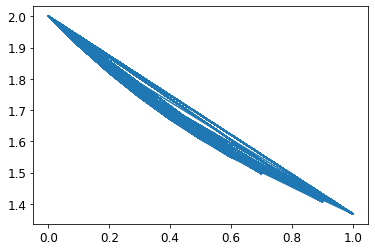

In [13]:
plt.plot(dfdate.decision_tree_score, func(dfdate.decision_tree_score, *popt))
plt.show()

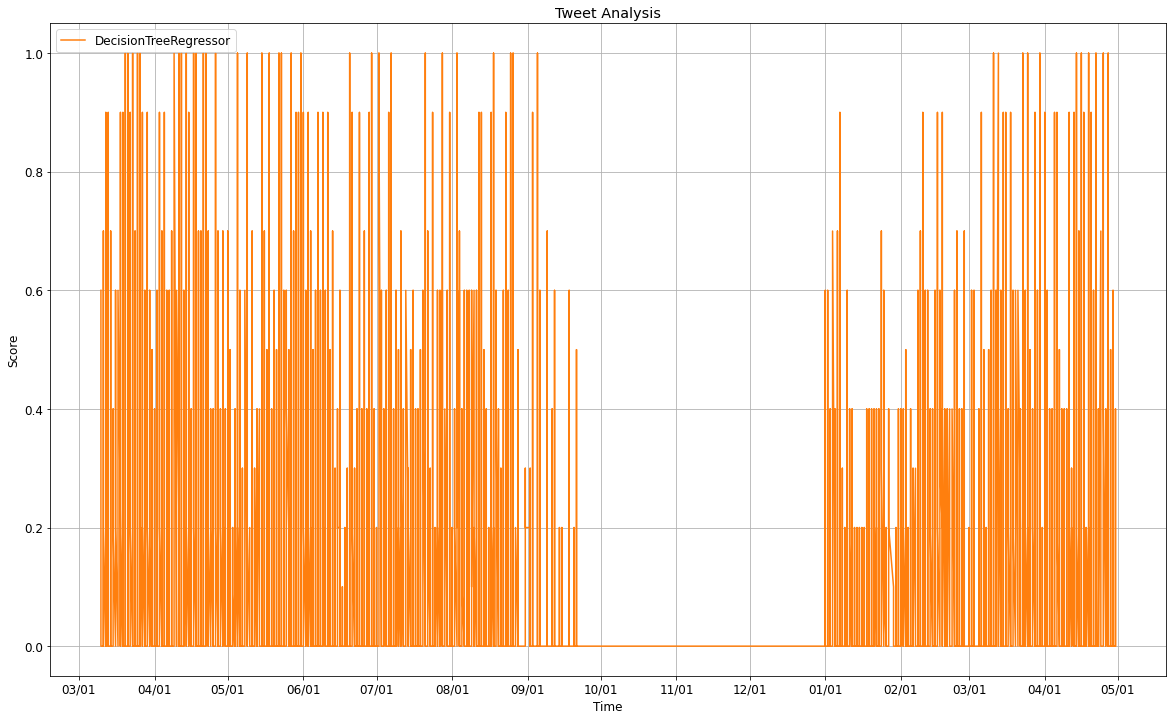

In [29]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 12))

# Specify how our lines should look
ax.plot(dfdate.index, dfdate.decision_tree_score, color='tab:orange', label='DecisionTreeRegressor')
# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Score')
ax.set_title('Tweet Analysis')
ax.grid(True)
ax.legend(loc='upper left')

# Helpers to format and locate ticks for dates
from matplotlib.dates import DateFormatter, MonthLocator

# Set the x-axis to do major ticks on the days and label them like '07/20'
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))

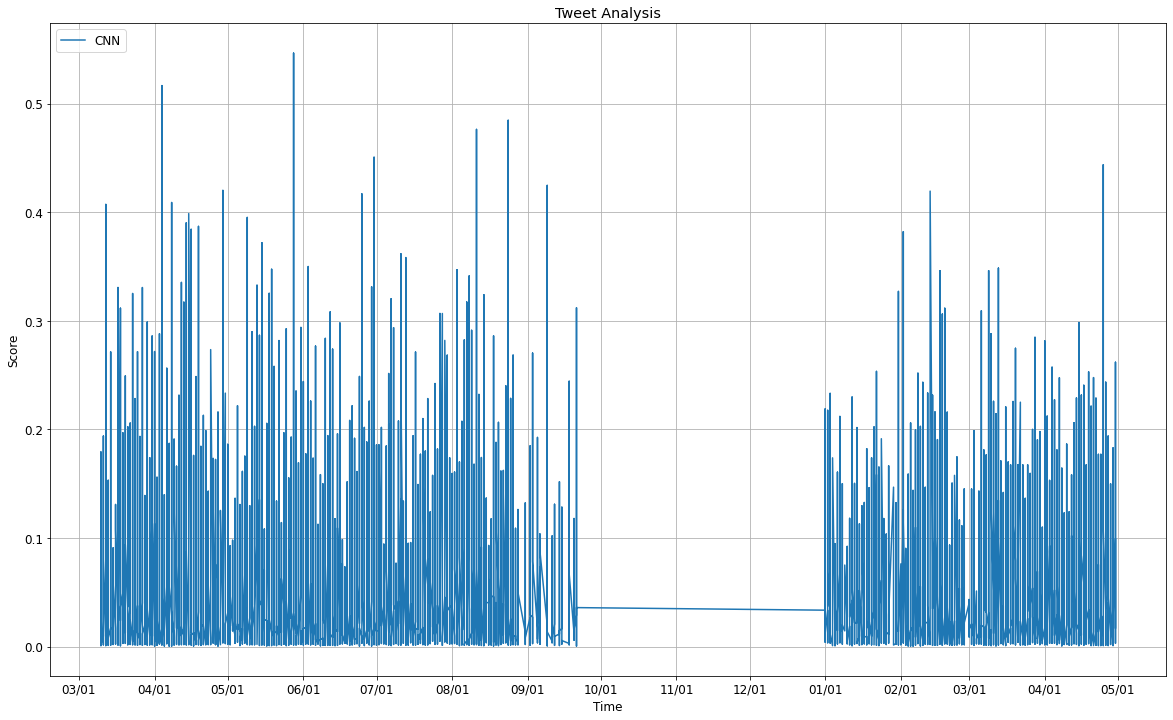

In [42]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 12))

# Specify how our lines should look
ax.plot(dfdate.index, dfdate.cnn_score, color='tab:blue', label='CNN')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Score')
ax.set_title('Tweet Analysis')
ax.grid(True)
ax.legend(loc='upper left')

# Helpers to format and locate ticks for dates
from matplotlib.dates import DateFormatter, MonthLocator

# Set the x-axis to do major ticks on the days and label them like '07/20'
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))

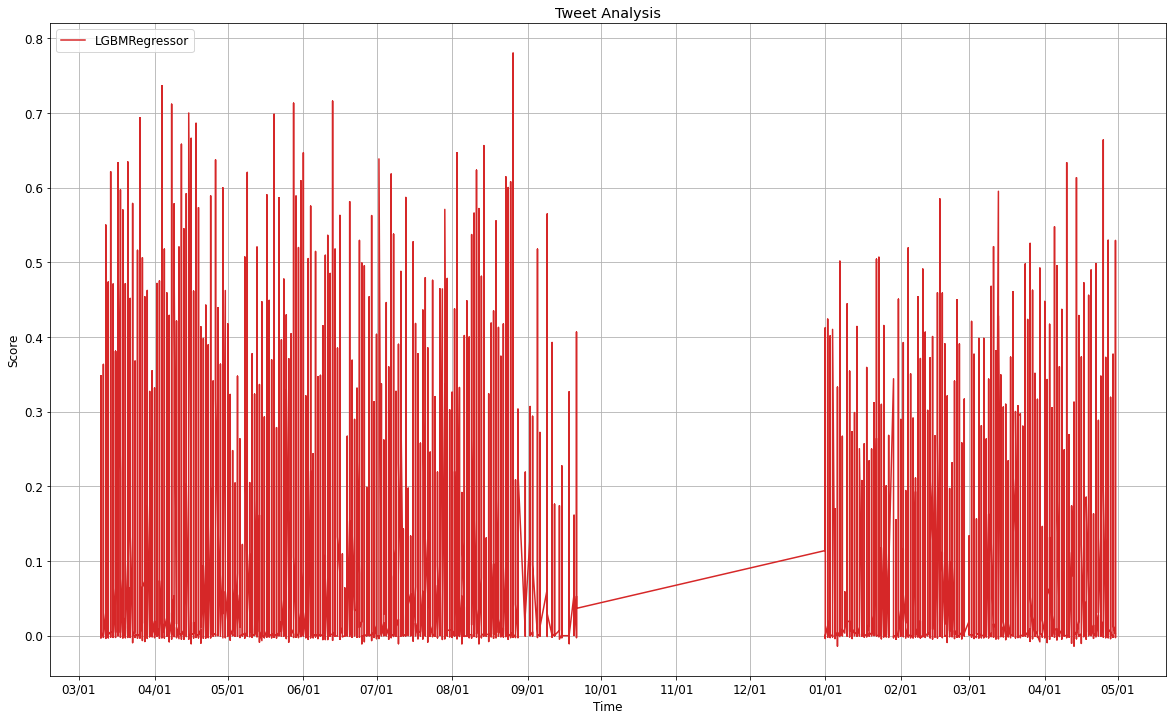

In [43]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 12))

ax.plot(dfdate.index, dfdate.lgbm_score, color='tab:red', label='LGBMRegressor')
# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Score')
ax.set_title('Tweet Analysis')
ax.grid(True)
ax.legend(loc='upper left')

# Helpers to format and locate ticks for dates
from matplotlib.dates import DateFormatter, MonthLocator

# Set the x-axis to do major ticks on the days and label them like '07/20'
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))

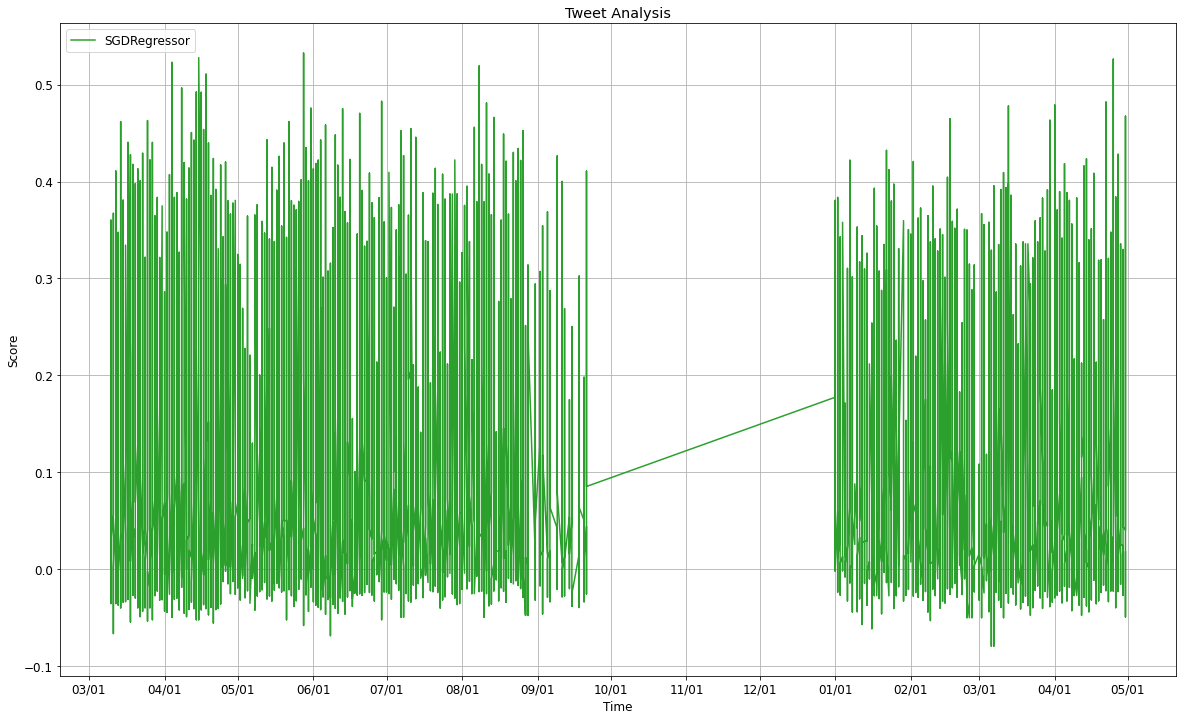

In [44]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 12))

ax.plot(dfdate.index, dfdate.sgd_score, color='tab:green', label='SGDRegressor')
# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Score')
ax.set_title('Tweet Analysis')
ax.grid(True)
ax.legend(loc='upper left')

# Helpers to format and locate ticks for dates
from matplotlib.dates import DateFormatter, MonthLocator

# Set the x-axis to do major ticks on the days and label them like '07/20'
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))

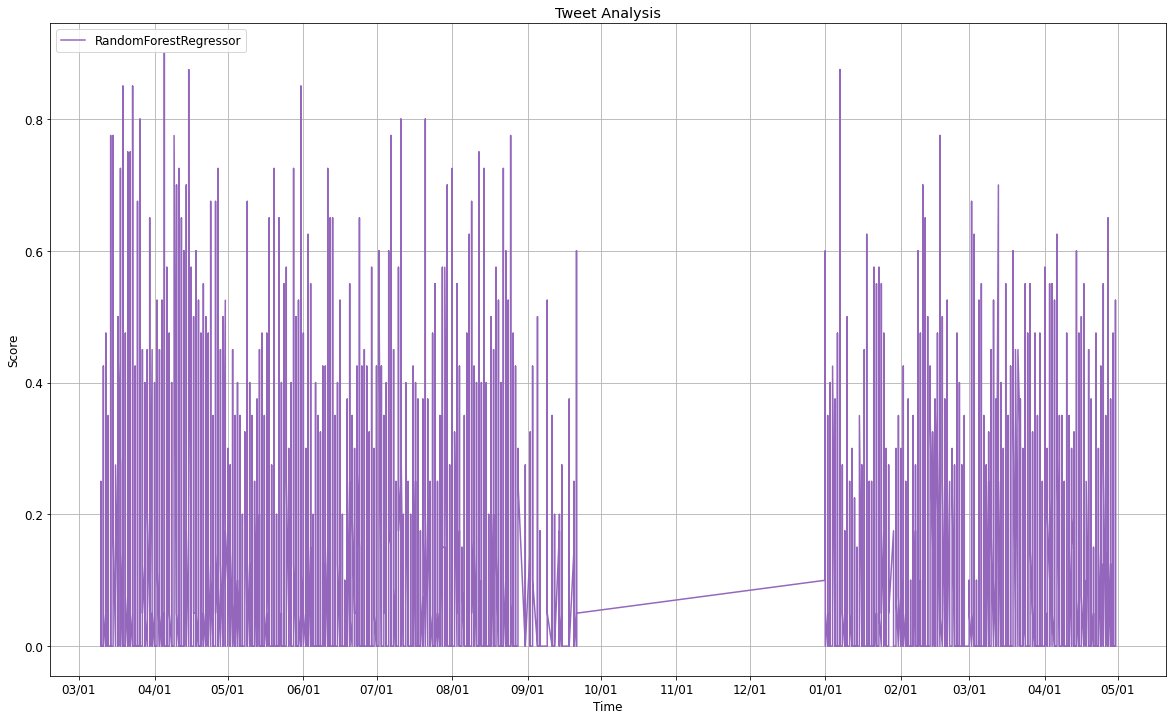

In [45]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 12))

ax.plot(dfdate.index, dfdate.random_forest_score, color='tab:purple', label='RandomForestRegressor')
# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Score')
ax.set_title('Tweet Analysis')
ax.grid(True)
ax.legend(loc='upper left')

# Helpers to format and locate ticks for dates
from matplotlib.dates import DateFormatter, MonthLocator

# Set the x-axis to do major ticks on the days and label them like '07/20'
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%m/%d'))